## Tugas Akhir Microcredential Associate Data Scientist

### ITS-05 kelompok 3

#### Preface

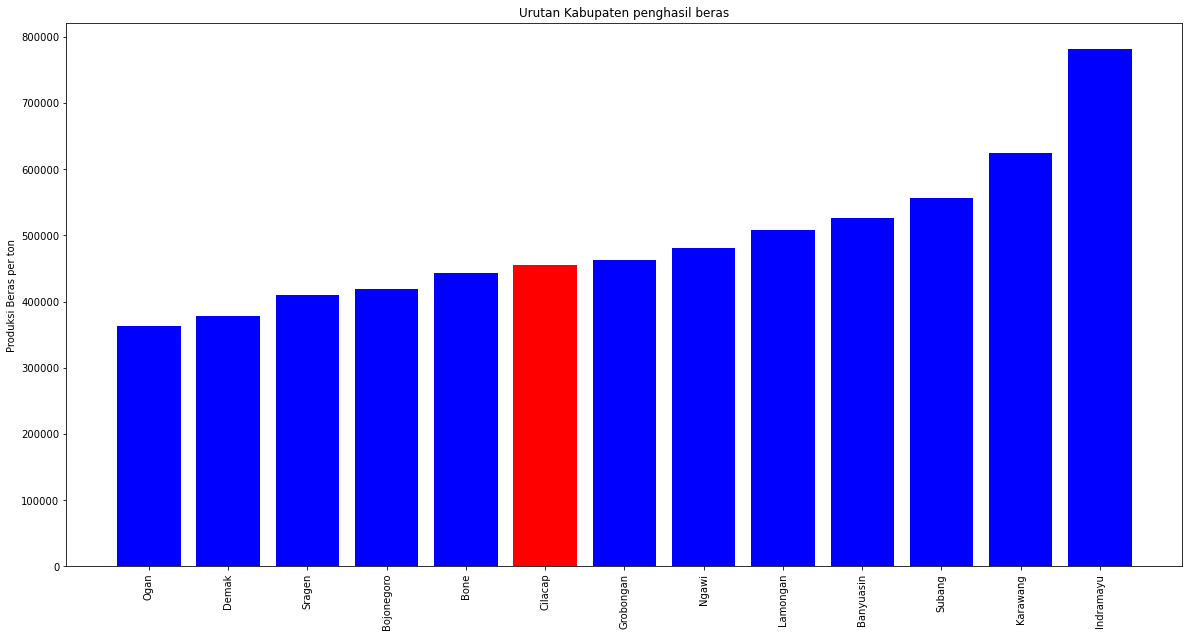

### Import Necessary Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as mno

In [2]:
# import 3 periode of season
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

# sumber data : https://www.bmkg.go.id/

ignore_data = ["8888"] # temporary, kalau ada ide buat ngolah nilai "8888", command ini bisa dihilangkan

df = pd.read_excel('dataset_iklim_cilacap_before_cleaning.xlsx', na_values = ignore_data)

In [3]:
# Quick data check

print(f"DataFrame shape : {df.shape}\n")
print(f"DataFrame columns: \n{df.columns}\n")
print(f"Columns type: {df.dtypes}")

df.head(3)

DataFrame shape : (547, 11)

DataFrame columns: 
Index(['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car'],
      dtype='object')

Columns type: Tanggal     object
Tn         float64
Tx         float64
Tavg       float64
RH_avg     float64
RR         float64
ss         float64
ff_x       float64
ddd_x      float64
ff_avg     float64
ddd_car     object
dtype: object


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-10-2018,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E
1,02-10-2018,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N
2,03-10-2018,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E


In [4]:
# Quick data prep

# kita ingin mengolah dataset ini di domain timeseries
from datetime import datetime
df['datetime'] = [datetime.strptime(x,'%d-%m-%Y') for x in df['Tanggal']] # change string 'Tanngal' to timeseries format

# change datetime as index; 
df = df.set_index('datetime')
df.drop('Tanggal', axis=1, inplace=True)

# change 'ddd_car' to categorical
df['ddd_car'] = pd.Categorical(df.ddd_car)

# renaming columns
df.rename(columns={"RR": "curah_hujan", "Tavg": "temp_avg", "RH_avg": "humid_avg", 
                   "ss": "sun_expo", "ff_x": "wind_max", "ff_avg": "wind_avg", "Tn": "temp_min", 
                   "Tx": "temp_max", "ddd_car": "wind_dir", "ddd_x": "wind_dir_max"}, inplace=True)



# Menambahkan kolom 'Year', 'Month', 'Weekday' untuk mempermudah visualisasi dan statiscical need
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

In [5]:
# Dividing 1 dataset to 3 periode (just for easier visualization & statistical description)
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

df_periode1 = df.loc['2018-10-01':'2019-03-01']
df_periode2 = df.loc['2019-10-01':'2020-03-01']
df_periode3 = df.loc['2020-10-01':'2021-03-01']

In [6]:
df_periode1.head(3)

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-01,23.0,30.4,27.2,83.0,NaN,3.2,5.0,140.0,2.0,E,2018,10,0
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-03,25.0,30.4,27.2,80.0,NaN,8.9,7.0,150.0,3.0,E,2018,10,2


### Exploratory Data Analysis

In [7]:
#### Curah Hujan

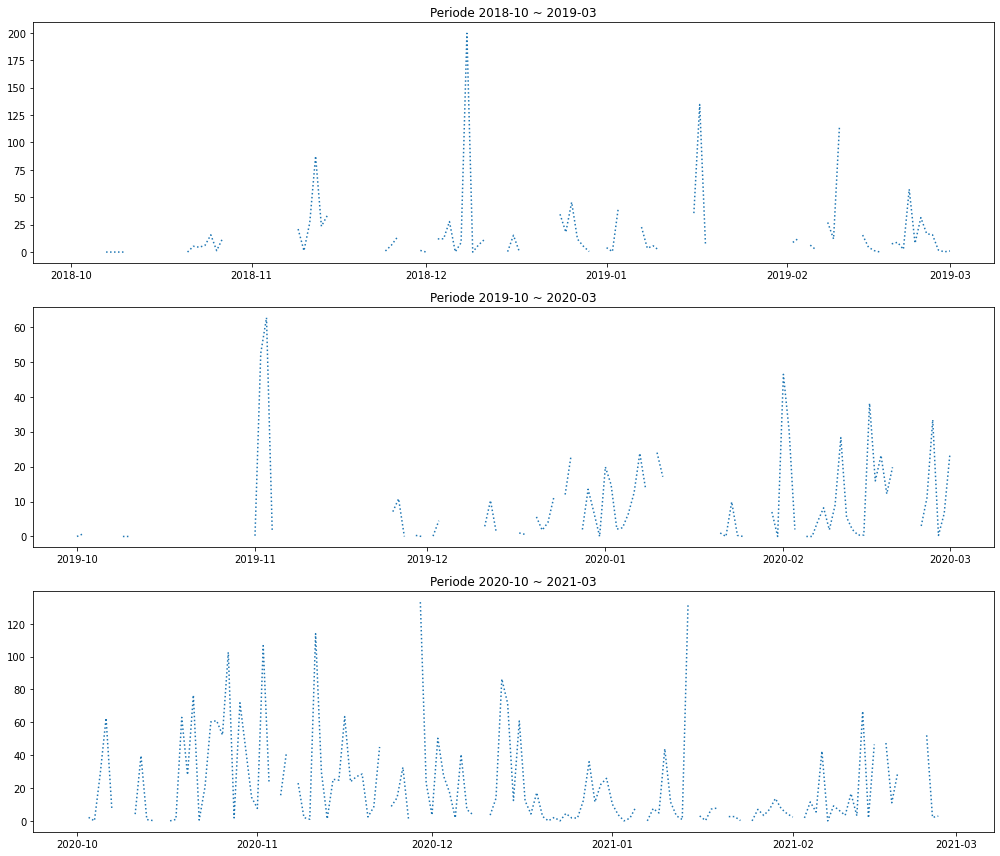

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,12))

axes[0].plot(df_periode1['curah_hujan'], linestyle=':')
axes[0].set_title('Periode 2018-10 ~ 2019-03')

axes[1].plot(df_periode2['curah_hujan'], linestyle=':')
axes[1].set_title('Periode 2019-10 ~ 2020-03')

axes[2].plot(df_periode3['curah_hujan'], linestyle=':')
axes[2].set_title('Periode 2020-10 ~ 2021-03')

plt.tight_layout()

##### Curah hujan per periode

In [9]:
# Note : Urutan bulan boxplots dibawah dimulai dari yang terkecil ke terbesar. Keep that in mind when analyzing.
# Mau diubah ke 10-11-12-01-02-03 tapi masih belum bisa

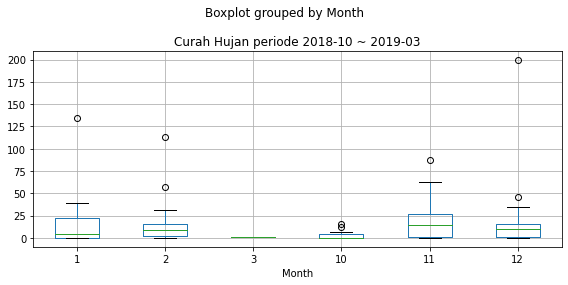

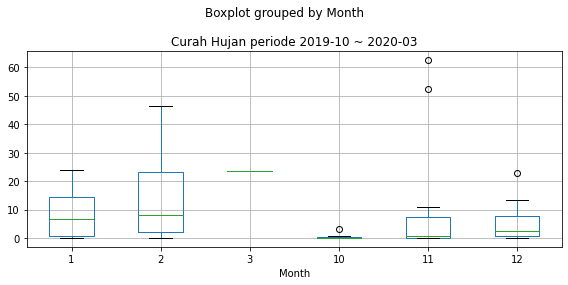

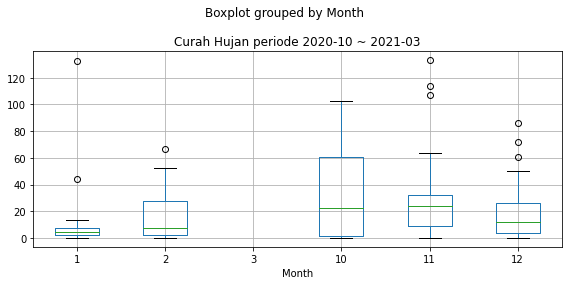

In [10]:
df_periode1.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2018-10 ~ 2019-03')
plt.tight_layout()

df_periode2.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2019-10 ~ 2020-03')
plt.tight_layout()

df_periode3.boxplot(column=['curah_hujan'], by='Month', figsize=(8, 4))
plt.title('Curah Hujan periode 2020-10 ~ 2021-03')
plt.tight_layout()


#### Check Distribution for all numerical data

In [11]:
df_num = df[['temp_min', 'temp_max', 'temp_avg', 'humid_avg', 'curah_hujan',
       'sun_expo', 'wind_max', 'wind_avg']]

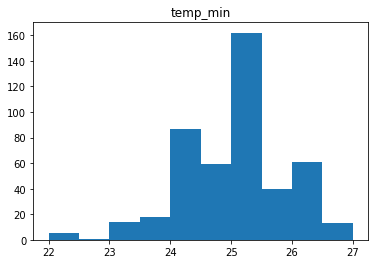

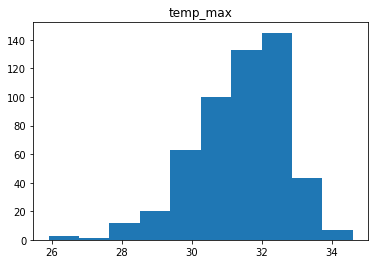

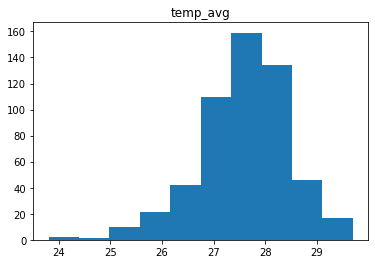

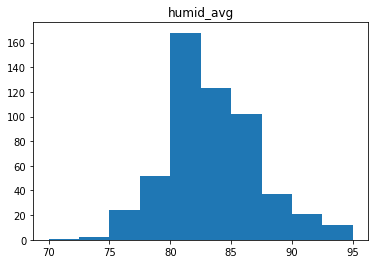

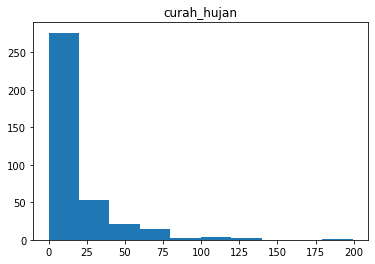

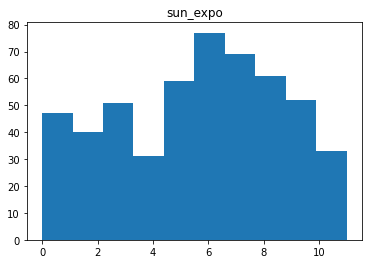

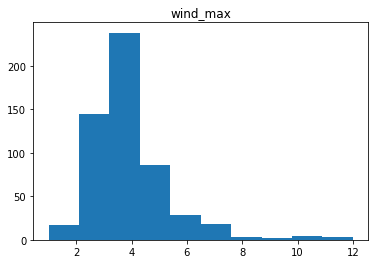

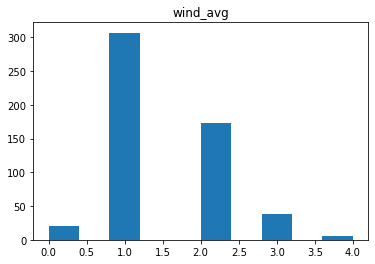

In [12]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

#### Scatterplotting numerical variabel dengan curah_hujan

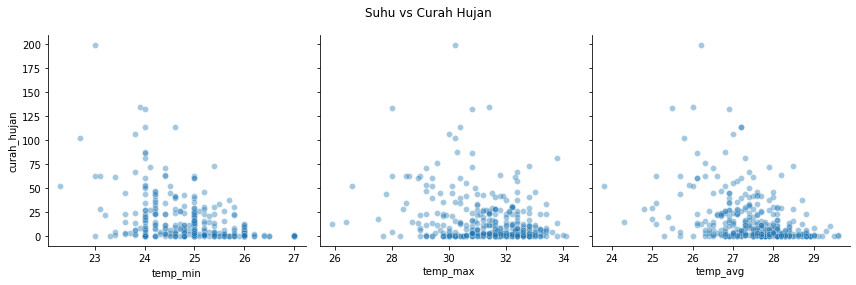

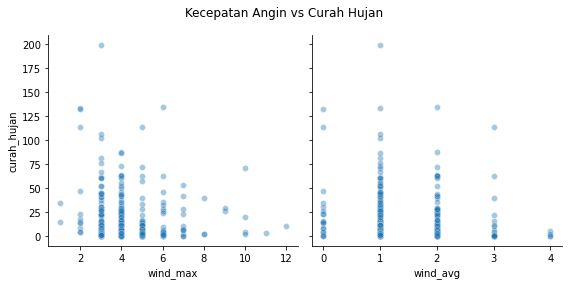

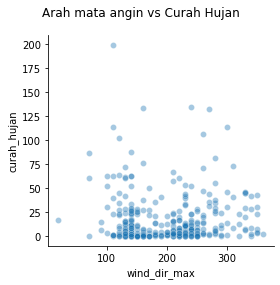

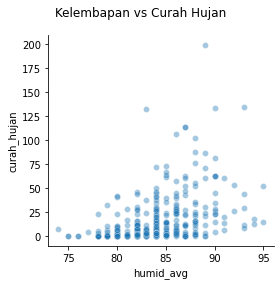

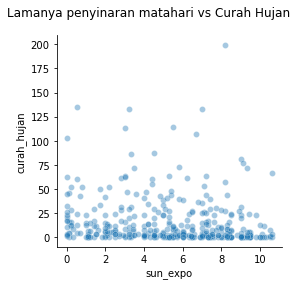

In [13]:
def pp(judul, *args):
    sns.pairplot(df, x_vars=args, y_vars=['curah_hujan'], height=4, aspect=1, kind='scatter', plot_kws={'alpha':0.4})
    plt.suptitle(judul)
    plt.tight_layout()
    plt.show()
    
pp('Suhu vs Curah Hujan', 'temp_min', 'temp_max', 'temp_avg')
pp('Kecepatan Angin vs Curah Hujan', 'wind_max', 'wind_avg')
pp('Arah mata angin vs Curah Hujan', 'wind_dir_max')
pp('Kelembapan vs Curah Hujan', 'humid_avg')
pp('Lamanya penyinaran matahari vs Curah Hujan', 'sun_expo')

In [14]:
#### Missing values

<AxesSubplot:>

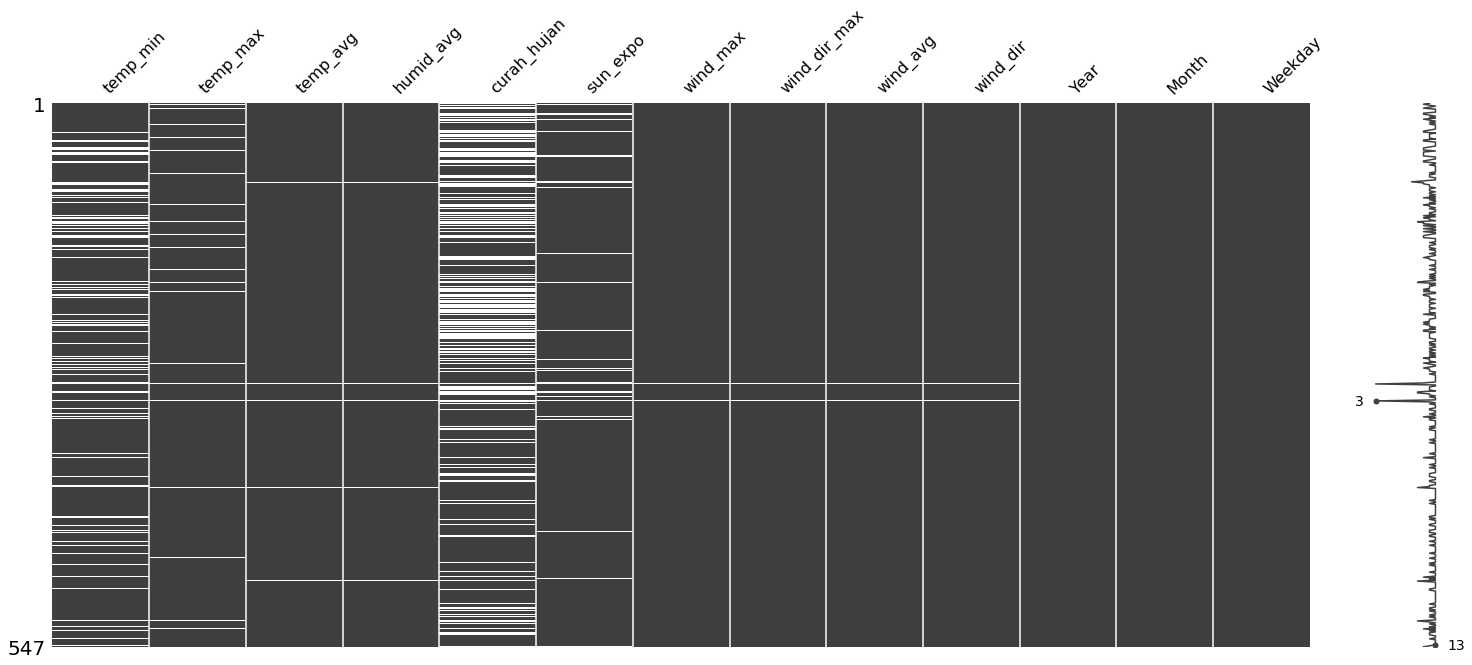

In [15]:
import missingno

missingno.matrix(df)

### Data Preparation (data cleaning)

In [16]:
#missing data

df.isnull().sum()

temp_min         87
temp_max         20
temp_avg          5
humid_avg         5
curah_hujan     172
sun_expo         27
wind_max          2
wind_dir_max      2
wind_avg          2
wind_dir          2
Year              0
Month             0
Weekday           0
dtype: int64

In [17]:
# mengganti missing values di kolom curah_hujan dengan 0
df_filtered_1 = df.replace({'curah_hujan': np.nan},0)
df_filtered_1.head()

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-01,23.0,30.4,27.2,83.0,0.0,3.2,5.0,140.0,2.0,E,2018,10,0
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-03,25.0,30.4,27.2,80.0,0.0,8.9,7.0,150.0,3.0,E,2018,10,2
2018-10-04,23.0,29.9,27.1,75.0,0.0,8.1,4.0,140.0,2.0,SE,2018,10,3
2018-10-05,22.0,29.8,25.4,82.0,0.0,10.2,4.0,140.0,2.0,SE,2018,10,4


In [18]:
# menghapus missing values perbaris di kolom curah hujan
df_filtered_2 = df.dropna(subset=['curah_hujan'])
df_filtered_2.head()

,temp_min,temp_max,temp_avg,humid_avg,curah_hujan,sun_expo,wind_max,wind_dir_max,wind_avg,wind_dir,Year,Month,Weekday
datetime,,,,,,,,,,,,,
2018-10-02,26.0,NaN,27.7,79.0,0.0,NaN,4.0,130.0,2.0,N,2018,10,1
2018-10-04,23.0,29.9,27.1,75.0,0.0,8.1,4.0,140.0,2.0,SE,2018,10,3
2018-10-07,25.0,31.7,26.9,84.0,0.0,9.5,6.0,110.0,3.0,E,2018,10,6
2018-10-08,25.0,29.4,26.4,87.0,0.0,9.4,5.0,140.0,3.0,SE,2018,10,0
2018-10-09,25.0,29.8,27.2,82.0,0.0,9.2,6.0,140.0,2.0,SE,2018,10,1


In [19]:
df_filtered_1.isnull().sum()

temp_min        87
temp_max        20
temp_avg         5
humid_avg        5
curah_hujan      0
sun_expo        27
wind_max         2
wind_dir_max     2
wind_avg         2
wind_dir         2
Year             0
Month            0
Weekday          0
dtype: int64

In [20]:
df_filtered_2.isnull().sum()

temp_min        46
temp_max         9
temp_avg         2
humid_avg        2
curah_hujan      0
sun_expo        12
wind_max         0
wind_dir_max     0
wind_avg         0
wind_dir         0
Year             0
Month            0
Weekday          0
dtype: int64